In [57]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

#format="%m/%d/%Y"
plt.style.use('fivethirtyeight')
df = pd.read_excel('Q2.Resample.xlsx')
df['DateTime'] = pd.to_datetime(df.DateTime)

df.head()

DateTime  TravelingTime  Distance Load  Avg grade (%)   
0 2023-04-01 08:00:00      18.033333         5313.0      -0.017500  \
1 2023-04-01 09:00:00      19.550000         5661.0       0.027500   
2 2023-04-01 10:00:00      18.700000         5395.0       0.032000   
3 2023-04-01 11:00:00      19.583333         5389.0       0.027500   
4 2023-04-01 12:00:00      18.966667         5439.5       0.017375   

   Rainfall Value (mm/m)  Rainfall (Hourly)  Temp (°C)  Humidity (%)   
0                    0.0                0.0    26.6200       83.7100  \
1                    0.0                0.0    28.5700       75.4800   
2                    0.0                0.0    30.6900       70.8200   
3                    0.0                0.0    30.2300       73.2600   
4                    0.0                0.0    29.0275       75.8175   

   Atmos (atm)  Wind Direction (°)  Wind Speed (m/s)  Month  Year   
0       1009.1             218.400             1.520      4  2023  \
1       1009.0             195.900             0.760      4  2023   
2       1008.0             210.800             0.720      4  2023   
3       1007.1              20.400             0.700      4  2023   
4       1008.3             161.375             0.925      4  2023   

                  Date      Time       Day  
0  2023-04-01 00:00:00  08:00:00  Saturday  
1  2023-04-01 00:00:00  09:00:00  Saturday  
2  2023-04-01 00:00:00  10:00:00  Saturday  
3  2023-04-01 00:00:00  11:00:00  Saturday  
4                45017       NaN       NaN

In [58]:
# https://medium.com/@fijaya/menjelaskan-algoritma-lstm-secara-sederhana-817373fb9791

In [59]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)

TravelingTime  Distance Load  Avg grade (%)   
DateTime                                                           
2023-04-01 08:00:00      18.033333         5313.0      -0.017500  \
2023-04-01 09:00:00      19.550000         5661.0       0.027500   
2023-04-01 10:00:00      18.700000         5395.0       0.032000   
2023-04-01 11:00:00      19.583333         5389.0       0.027500   
2023-04-01 12:00:00      18.966667         5439.5       0.017375   
2023-04-01 13:00:00      19.150000         5498.0       0.027500   
2023-04-01 14:00:00      19.883333         5817.0       0.027500   
2023-04-01 15:00:00      17.866667         5231.0       0.027500   
2023-04-01 16:00:00      19.666667         5723.0       0.027500   
2023-04-01 17:00:00      18.533333         5625.0       0.027500   

                     Rainfall Value (mm/m)  Rainfall (Hourly)  Temp (°C)   
DateTime                                                                   
2023-04-01 08:00:00                    0.0                0.0    26.6200  \
2023-04-01 09:00:00                    0.0                0.0    28.5700   
2023-04-01 10:00:00                    0.0                0.0    30.6900   
2023-04-01 11:00:00                    0.0                0.0    30.2300   
2023-04-01 12:00:00                    0.0                0.0    29.0275   
2023-04-01 13:00:00                    0.0                0.0    32.3400   
2023-04-01 14:00:00                    0.0                0.0    32.6400   
2023-04-01 15:00:00                    0.0                0.0    32.3600   
2023-04-01 16:00:00                    0.0                0.0    30.3700   
2023-04-01 17:00:00                    0.0                0.0    28.8900   

                     Humidity (%)  Atmos (atm)  Wind Direction (°)   
DateTime                                                             
2023-04-01 08:00:00       83.7100       1009.1             218.400  \
2023-04-01 09:00:00       75.4800       1009.0             195.900   
2023-04-01 10:00:00       70.8200       1008.0             210.800   
2023-04-01 11:00:00       73.2600       1007.1              20.400   
2023-04-01 12:00:00       75.8175       1008.3             161.375   
2023-04-01 13:00:00       63.4800       1004.6              69.600   
2023-04-01 14:00:00       61.8000       1003.5             146.900   
2023-04-01 15:00:00       64.2800       1003.2             113.900   
2023-04-01 16:00:00       74.7800       1003.6             109.500   
2023-04-01 17:00:00       81.9700       1004.5              45.600   

                     Wind Speed (m/s)  Month  Year        Date      Time   
DateTime                                                                   
2023-04-01 08:00:00             1.520      4  2023  2023-04-01  08:00:00  \
2023-04-01 09:00:00             0.760      4  2023  2023-04-01  09:00:00   
2023-04-01 10:00:00             0.720      4  2023  2023-04-01  10:00:00   
2023-04-01 11:00:00             0.700      4  2023  2023-04-01  11:00:00   
2023-04-01 12:00:00             0.925      4  2023  2023-04-01  12:00:00   
2023-04-01 13:00:00             1.450      4  2023  2023-04-01  13:00:00   
2023-04-01 14:00:00             2.350      4  2023  2023-04-01  14:00:00   
2023-04-01 15:00:00             1.550      4  2023  2023-04-01  15:00:00   
2023-04-01 16:00:00             0.220      4  2023  2023-04-01  16:00:00   
2023-04-01 17:00:00             1.290      4  2023  2023-04-01  17:00:00   

                          Day  
DateTime                       
2023-04-01 08:00:00  Saturday  
2023-04-01 09:00:00  Saturday  
2023-04-01 10:00:00  Saturday  
2023-04-01 11:00:00  Saturday  
2023-04-01 12:00:00  Saturday  
2023-04-01 13:00:00  Saturday  
2023-04-01 14:00:00  Saturday  
2023-04-01 15:00:00  Saturday  
2023-04-01 16:00:00  Saturday  
2023-04-01 17:00:00  Saturday

In [60]:
# lakukan resampling berupa downsampling untuk mengambil sampel trip pada tiap jamnya
NewDataSet = dataset.resample('H').max()

In [61]:
NewDataSet.head(2200)

TravelingTime  Distance Load  Avg grade (%)   
DateTime                                                           
2023-04-01 08:00:00      18.033333         5313.0      -0.017500  \
2023-04-01 09:00:00      19.550000         5661.0       0.027500   
2023-04-01 10:00:00      18.700000         5395.0       0.032000   
2023-04-01 11:00:00      19.583333         5389.0       0.027500   
2023-04-01 12:00:00      18.966667         5439.5       0.017375   
...                            ...            ...            ...   
2023-06-09 19:00:00      19.483333         5591.0       0.031000   
2023-06-09 20:00:00      19.233333         5747.0       0.031000   
2023-06-09 21:00:00      19.533333         5751.0       0.031000   
2023-06-09 22:00:00      19.550000         5668.0       0.031000   
2023-06-09 23:00:00      19.850000         5668.0       0.031000   

                     Rainfall Value (mm/m)  Rainfall (Hourly)  Temp (°C)   
DateTime                                                                   
2023-04-01 08:00:00                    0.0                0.0    26.6200  \
2023-04-01 09:00:00                    0.0                0.0    28.5700   
2023-04-01 10:00:00                    0.0                0.0    30.6900   
2023-04-01 11:00:00                    0.0                0.0    30.2300   
2023-04-01 12:00:00                    0.0                0.0    29.0275   
...                                    ...                ...        ...   
2023-06-09 19:00:00                    0.0                0.2    30.3900   
2023-06-09 20:00:00                    0.0                0.2    32.4600   
2023-06-09 21:00:00                    0.0                0.2    30.0200   
2023-06-09 22:00:00                    0.0                0.2    26.6300   
2023-06-09 23:00:00                    0.0                0.0    32.5100   

                     Humidity (%)  Atmos (atm)  Wind Direction (°)   
DateTime                                                             
2023-04-01 08:00:00       83.7100       1009.1             218.400  \
2023-04-01 09:00:00       75.4800       1009.0             195.900   
2023-04-01 10:00:00       70.8200       1008.0             210.800   
2023-04-01 11:00:00       73.2600       1007.1              20.400   
2023-04-01 12:00:00       75.8175       1008.3             161.375   
...                           ...          ...                 ...   
2023-06-09 19:00:00       93.9600       1007.7             192.500   
2023-06-09 20:00:00       76.8000       1007.4             192.500   
2023-06-09 21:00:00       93.8400       1006.9             190.400   
2023-06-09 22:00:00       94.1100       1006.8             227.100   
2023-06-09 23:00:00       93.0700       1007.0             243.300   

                     Wind Speed (m/s)  Month  Year        Date      Time   
DateTime                                                                   
2023-04-01 08:00:00             1.520      4  2023  2023-04-01  08:00:00  \
2023-04-01 09:00:00             0.760      4  2023  2023-04-01  09:00:00   
2023-04-01 10:00:00             0.720      4  2023  2023-04-01  10:00:00   
2023-04-01 11:00:00             0.700      4  2023  2023-04-01  11:00:00   
2023-04-01 12:00:00             0.925      4  2023  2023-04-01  12:00:00   
...                               ...    ...   ...         ...       ...   
2023-06-09 19:00:00             5.280      6  2023  2023-06-09  19:00:00   
2023-06-09 20:00:00             1.310      6  2023  2023-06-09  20:00:00   
2023-06-09 21:00:00             2.570      6  2023  2023-06-09  21:00:00   
2023-06-09 22:00:00             4.630      6  2023  2023-06-09  22:00:00   
2023-06-09 23:00:00             1.500      6  2023  2023-06-09  23:00:00   

                          Day  
DateTime                       
2023-04-01 08:00:00  Saturday  
2023-04-01 09:00:00  Saturday  
2023-04-01 10:00:00  Saturday  
2023-04-01 11:00:00  Saturday  
2023-04-01 12:00:00  Saturday  
...                    

In [62]:
NewDataSet[NewDataSet['TravelingTime'].isnull()]

Empty DataFrame
Columns: [TravelingTime, Distance Load, Avg grade (%), Rainfall Value (mm/m), Rainfall (Hourly), Temp (°C), Humidity (%), Atmos (atm), Wind Direction (°), Wind Speed (m/s), Month, Year, Date, Time, Day]
Index: []

In [63]:
#Get the number of rows and columns in the data set
NewDataSet.shape

(1672, 15)

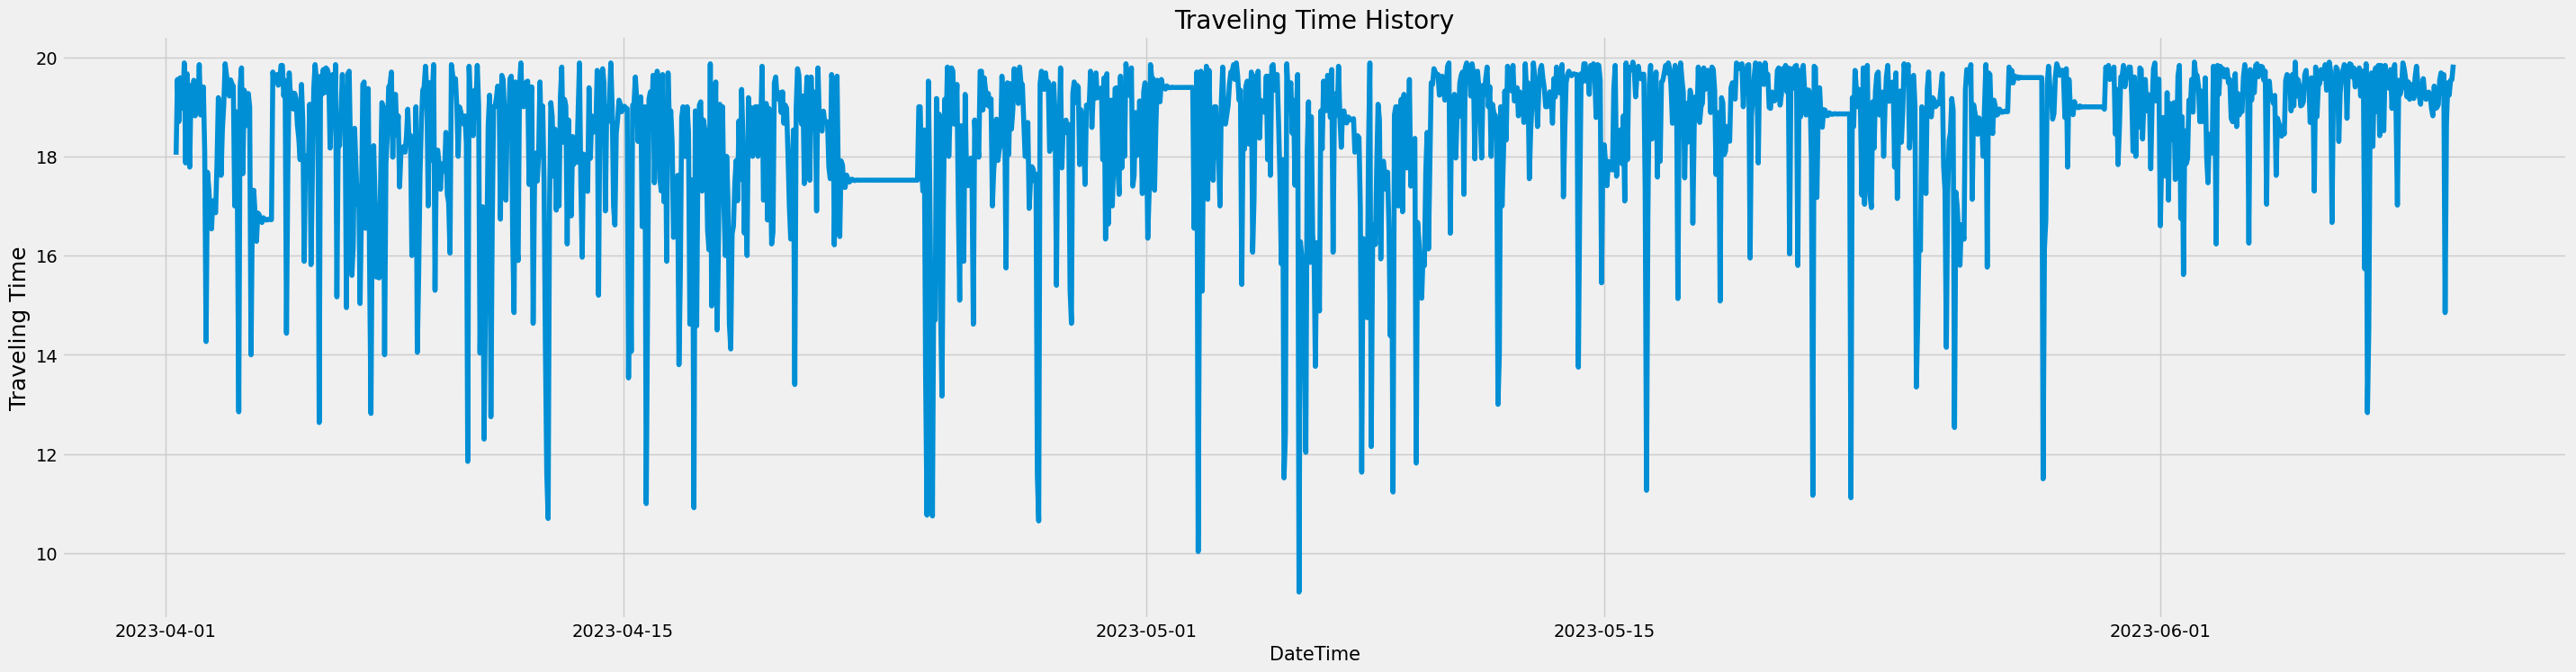

In [64]:
plt.figure(figsize=(32,8)) #ini ukuran diagramnya
plt.title('Traveling Time History') #Beri nama visualnya dengan nama 'Close Price History'

#We give the plot the data (the closing price of our stock)
plt.plot(NewDataSet['TravelingTime'])

#Labelin axis x dan y nya
plt.xlabel('DateTime', fontsize=15)
plt.ylabel('Traveling Time', fontsize=18)

plt.show()

In [65]:
data = NewDataSet.filter(['TravelingTime'])

dataset = data.values

In [66]:
train_start_dt = '2023-04-01 00:00:00'
test_start_dt = '2023-06-04 15:00:00'

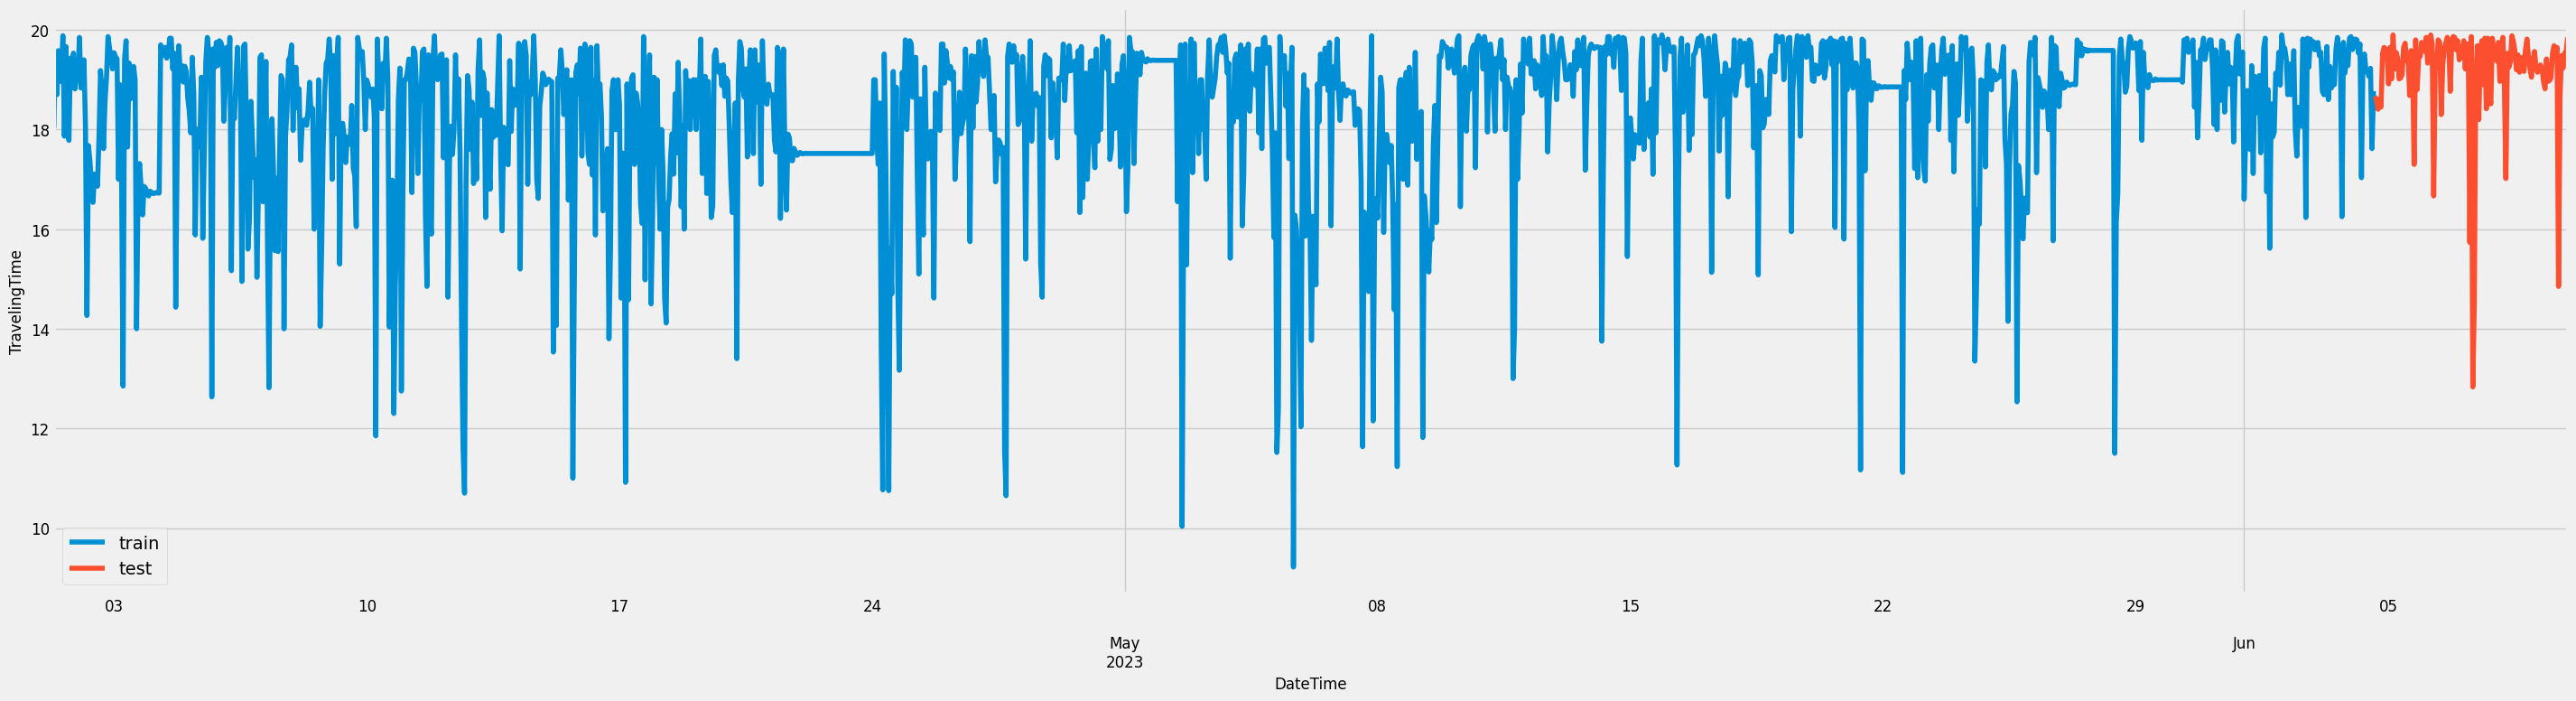

In [67]:
data[(data.index < test_start_dt) & (data.index >= train_start_dt)][['TravelingTime']].rename(columns={'TravelingTime':'train'}) \
    .join(data[test_start_dt:][['TravelingTime']].rename(columns={'TravelingTime':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(32, 8), fontsize=12)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('TravelingTime', fontsize=12)
plt.show()

In [68]:
train = data.copy()[(data.index >= train_start_dt) & (data.index < test_start_dt)][['TravelingTime']]
test = data.copy()[data.index >= test_start_dt][['TravelingTime']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1543, 1)
Test data shape:  (129, 1)


In [69]:
#scaling train set
scaler = MinMaxScaler(feature_range=(0,1))
train['TravelingTime'] = scaler.fit_transform(train)
train.head(5)

TravelingTime
DateTime                          
2023-04-01 08:00:00       0.825273
2023-04-01 09:00:00       0.967239
2023-04-01 10:00:00       0.887676
2023-04-01 11:00:00       0.970359
2023-04-01 12:00:00       0.912637

In [70]:

#scaling test set
test['TravelingTime'] = scaler.transform(test)
test.head(5)

TravelingTime
DateTime                          
2023-06-04 15:00:00       0.884921
2023-06-04 16:00:00       0.875652
2023-06-04 17:00:00       0.860263
2023-06-04 18:00:00       0.878761
2023-06-04 19:00:00       0.864275

In [71]:

#Converting to numpy
train_data = train.values
test_data = test.values

In [72]:

test_data.shape

(129, 1)

In [73]:
# Selecting the timesteps

timesteps=5

In [74]:
# Converting train data to 2D tensor
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps

array([[0.82527301, 0.96723869, 0.88767551, 0.97035881, 0.91263651],
       [0.96723869, 0.88767551, 0.97035881, 0.91263651, 0.92979719],
       [0.88767551, 0.97035881, 0.91263651, 0.92979719, 0.99843994],
       [0.97035881, 0.91263651, 0.92979719, 0.99843994, 0.80967239],
       [0.91263651, 0.92979719, 0.99843994, 0.80967239, 0.97815913],
       [0.92979719, 0.99843994, 0.80967239, 0.97815913, 0.87207488],
       [0.99843994, 0.80967239, 0.97815913, 0.87207488, 0.80187207],
       [0.80967239, 0.97815913, 0.87207488, 0.80187207, 0.95631825],
       [0.97815913, 0.87207488, 0.80187207, 0.95631825, 0.90015601],
       [0.87207488, 0.80187207, 0.95631825, 0.90015601, 0.96567863],
       [0.80187207, 0.95631825, 0.90015601, 0.96567863, 0.89859594],
       [0.95631825, 0.90015601, 0.96567863, 0.89859594, 0.92355694],
       [0.90015601, 0.96567863, 0.89859594, 0.92355694, 0.92199688],
       [0.96567863, 0.89859594, 0.92355694, 0.92199688, 0.99531981],
       [0.89859594, 0.92355694, 0.

In [75]:
# Converting test data to 2D tensor

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(125, 5)

In [76]:
#Select inputs and outputs from training and test data:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1539, 4) (1539, 1)
(125, 4) (125, 1)


In [77]:
from sklearn import neighbors
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [78]:
model1 = neighbors.KNeighborsRegressor(n_neighbors= 11)
model1.fit(x_train, y_train) 



KNeighborsRegressor(n_neighbors=11)

In [79]:
# Create model using RBF kernel
model2 = SVR(kernel='linear',gamma=0.001, epsilon= 0.01, C=1.0) 
# Fit model on training data
model2.fit(x_train, y_train[:,0])

SVR(epsilon=0.01, gamma=0.001, kernel='linear')

In [80]:
# Making predictions fir train set and test set

y_train_pred = model1.predict(x_train).reshape(-1,1)
y_test_pred = model1.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(1539, 1) (125, 1)


In [81]:
# Making predictions fir train set and test set

y_train_pred2 = model2.predict(x_train).reshape(-1,1)
y_test_pred2 = model2.predict(x_test).reshape(-1,1)

print(y_train_pred2.shape, y_test_pred2.shape)

(1539, 1) (125, 1)


In [82]:
y_train_pred

array([[0.9218196 ],
       [0.89614948],
       [0.89256843],
       [0.95677918],
       [0.86523188],
       [0.85616624],
       [0.8933889 ],
       [0.85065948],
       [0.90031611],
       [0.84669506],
       [0.91903631],
       [0.85980712],
       [0.8754432 ],
       [0.91561259],
       [0.91855765],
       [0.85940824],
       [0.90269997],
       [0.87830627],
       [0.84037725],
       [0.69174585],
       [0.79985995],
       [0.68666235],
       [0.7601875 ],
       [0.74649071],
       [0.7325296 ],
       [0.73903816],
       [0.7387614 ],
       [0.75232314],
       [0.8101786 ],
       [0.85888526],
       [0.84583747],
       [0.88905829],
       [0.88452657],
       [0.92199688],
       [0.92525883],
       [0.85108495],
       [0.91646575],
       [0.94191053],
       [0.94004527],
       [0.90477314],
       [0.86417528],
       [0.88638136],
       [0.7814849 ],
       [0.65583091],
       [0.83597185],
       [0.90175152],
       [0.86994753],
       [0.858

In [83]:
y_train

array([[0.91263651],
       [0.92979719],
       [0.99843994],
       [0.80967239],
       [0.97815913],
       [0.87207488],
       [0.80187207],
       [0.95631825],
       [0.90015601],
       [0.96567863],
       [0.89859594],
       [0.92355694],
       [0.92199688],
       [0.99531981],
       [0.90015601],
       [0.91263651],
       [0.95319813],
       [0.8299532 ],
       [0.47269891],
       [0.79212168],
       [0.76199298],
       [0.71419169],
       [0.68525132],
       [0.73838942],
       [0.72495635],
       [0.71569719],
       [0.80811232],
       [0.93291732],
       [0.89703588],
       [0.78627145],
       [0.87363495],
       [0.92043682],
       [0.99687988],
       [0.975039  ],
       [0.95787832],
       [0.93603744],
       [0.96645866],
       [0.95885335],
       [0.95480694],
       [0.72854914],
       [0.90639626],
       [0.73166927],
       [0.3400936 ],
       [0.95475819],
       [0.98907956],
       [0.78939158],
       [0.94695788],
       [0.879

In [84]:
y_train_pred.shape

(1539, 1)

In [85]:
#  Reverse Scaling the predictions

y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

1539 125


In [86]:
#  Reverse Scaling the predictions

y_train_pred2 = scaler.inverse_transform(y_train_pred2)
y_test_pred2 = scaler.inverse_transform(y_test_pred2)

print(len(y_train_pred2), len(y_test_pred2))

1539 125


In [87]:
y_train_pred2

array([[19.17059749],
       [19.14292699],
       [19.14630937],
       [19.41753053],
       [18.83634844],
       [19.22876532],
       [18.92340695],
       [18.55063837],
       [18.98933402],
       [18.83018171],
       [19.13222212],
       [19.09318917],
       [19.10625619],
       [19.10987705],
       [19.33021044],
       [19.14892962],
       [19.14261435],
       [19.23622794],
       [18.78711265],
       [17.39392826],
       [17.74081091],
       [17.48112013],
       [17.37399032],
       [17.49746241],
       [17.52334594],
       [17.4689797 ],
       [17.4659446 ],
       [17.81275854],
       [18.38345992],
       [18.61344785],
       [18.46492924],
       [18.66067234],
       [18.75989835],
       [19.12713644],
       [19.35678238],
       [19.43340976],
       [19.37697652],
       [19.39384248],
       [19.36595856],
       [19.3628861 ],
       [18.58156129],
       [18.79690292],
       [18.12485799],
       [16.4745443 ],
       [17.87103417],
       [18

In [88]:
# Scaling the original values

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

1539 125


In [89]:
y_train

array([[18.96666667],
       [19.15      ],
       [19.88333333],
       [17.86666667],
       [19.66666667],
       [18.53333333],
       [17.78333333],
       [19.43333333],
       [18.83333333],
       [19.53333333],
       [18.81666667],
       [19.08333333],
       [19.06666667],
       [19.85      ],
       [18.83333333],
       [18.96666667],
       [19.4       ],
       [18.08333333],
       [14.26666667],
       [17.67916667],
       [17.35729167],
       [16.84661458],
       [16.5374349 ],
       [17.10512695],
       [16.96161702],
       [16.86269836],
       [17.85      ],
       [19.18333333],
       [18.8       ],
       [17.61666667],
       [18.55      ],
       [19.05      ],
       [19.86666667],
       [19.63333333],
       [19.45      ],
       [19.21666667],
       [19.54166667],
       [19.46041667],
       [19.4171875 ],
       [16.99999999],
       [18.9       ],
       [17.03333333],
       [12.85      ],
       [19.41666667],
       [19.78333333],
       [17

In [90]:
y_test

array([[18.45000001],
       [19.53333333],
       [19.65      ],
       [19.61666667],
       [19.56666667],
       [18.91666667],
       [19.64999999],
       [19.01666667],
       [19.9       ],
       [19.21666667],
       [19.55      ],
       [19.43333334],
       [19.01666667],
       [19.03333333],
       [19.1       ],
       [19.65      ],
       [19.73333334],
       [19.37916667],
       [19.45      ],
       [18.68333333],
       [19.58333333],
       [19.26666667],
       [17.3       ],
       [19.80000001],
       [18.8       ],
       [19.45      ],
       [19.46666666],
       [19.75      ],
       [19.61666666],
       [19.57083333],
       [19.85      ],
       [19.33333334],
       [19.48333334],
       [19.9       ],
       [19.71666667],
       [16.66666667],
       [19.21666666],
       [19.28333333],
       [19.8       ],
       [19.75000001],
       [18.29999999],
       [19.28333333],
       [19.61666667],
       [19.73333334],
       [19.85      ],
       [19

In [91]:
y_test_pred

array([[18.30778106],
       [17.62240374],
       [18.53939394],
       [18.59280303],
       [18.2762133 ],
       [18.85126347],
       [18.98333333],
       [18.76950758],
       [18.42225379],
       [19.05228332],
       [18.93825758],
       [18.97138843],
       [19.1539959 ],
       [19.40286458],
       [19.2125947 ],
       [19.10327065],
       [19.13333333],
       [19.03484849],
       [18.66349432],
       [19.06521401],
       [18.86638258],
       [18.69545454],
       [18.90655777],
       [18.80492424],
       [18.53598485],
       [18.50445076],
       [18.99488636],
       [18.93098366],
       [19.13599544],
       [19.29721341],
       [18.56969803],
       [19.29267578],
       [19.41629053],
       [19.02719318],
       [19.23049242],
       [18.5735322 ],
       [19.03075739],
       [18.54375   ],
       [17.62599432],
       [19.10606061],
       [19.03977273],
       [18.81780303],
       [19.31363636],
       [18.61628788],
       [19.2421224 ],
       [18

In [92]:
#KNN

from sklearn.metrics import mean_absolute_error as mae 
rmse = sqrt(mean_squared_error(y_test, y_test_pred))
mae =mae(y_test, y_test_pred)
rmse, mae

(1.1085032368655099, 0.738867784897147)

In [93]:
#SVR
from math import *
from sklearn.metrics import mean_absolute_error as mae
 
rmse = sqrt(mean_squared_error(y_test, y_test_pred2))
mae =mae(y_test, y_test_pred2)
rmse, mae

(1.0431731411233158, 0.5952040277083105)

In [94]:
y_train.shape, y_test.shape

((1539, 1), (125, 1))

In [95]:
y_train_pred.shape

(1539, 1)

In [96]:
y_test_pred.shape

(125, 1)

In [97]:
train_timestamps = data[(data.index < test_start_dt) & (data.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = data[test_start_dt:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))


1539 125


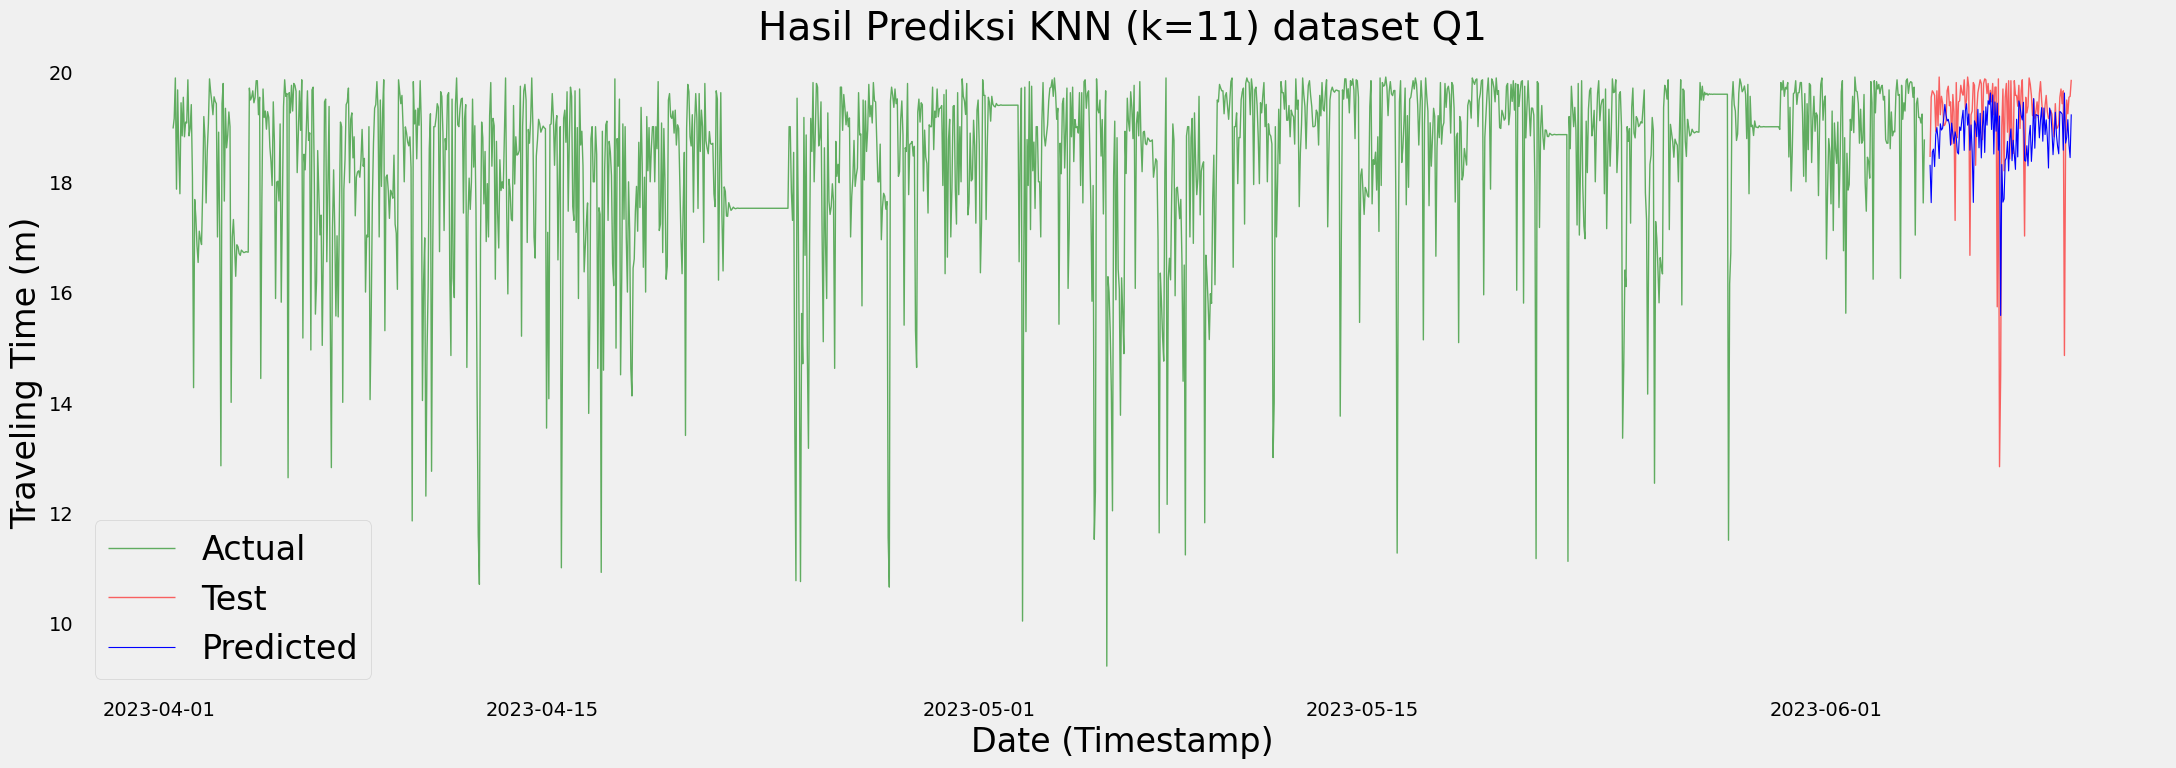

In [98]:
#Visualizing  Actual train set values against predicted train setvalues
plt.figure(figsize=(24,8))
plt.plot(train_timestamps, y_train, color = 'green', linewidth=1.0, alpha = 0.6)
plt.plot(test_timestamps, y_test, color = 'red', linewidth=1.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Test','Predicted'], fontsize=24)
plt.xlabel('Date (Timestamp)', fontsize=24)
plt.ylabel('Traveling Time (m)', fontsize=24)
plt.title("Hasil Prediksi KNN (k=11) dataset Q1", fontsize=28)
plt.grid()
plt.show()

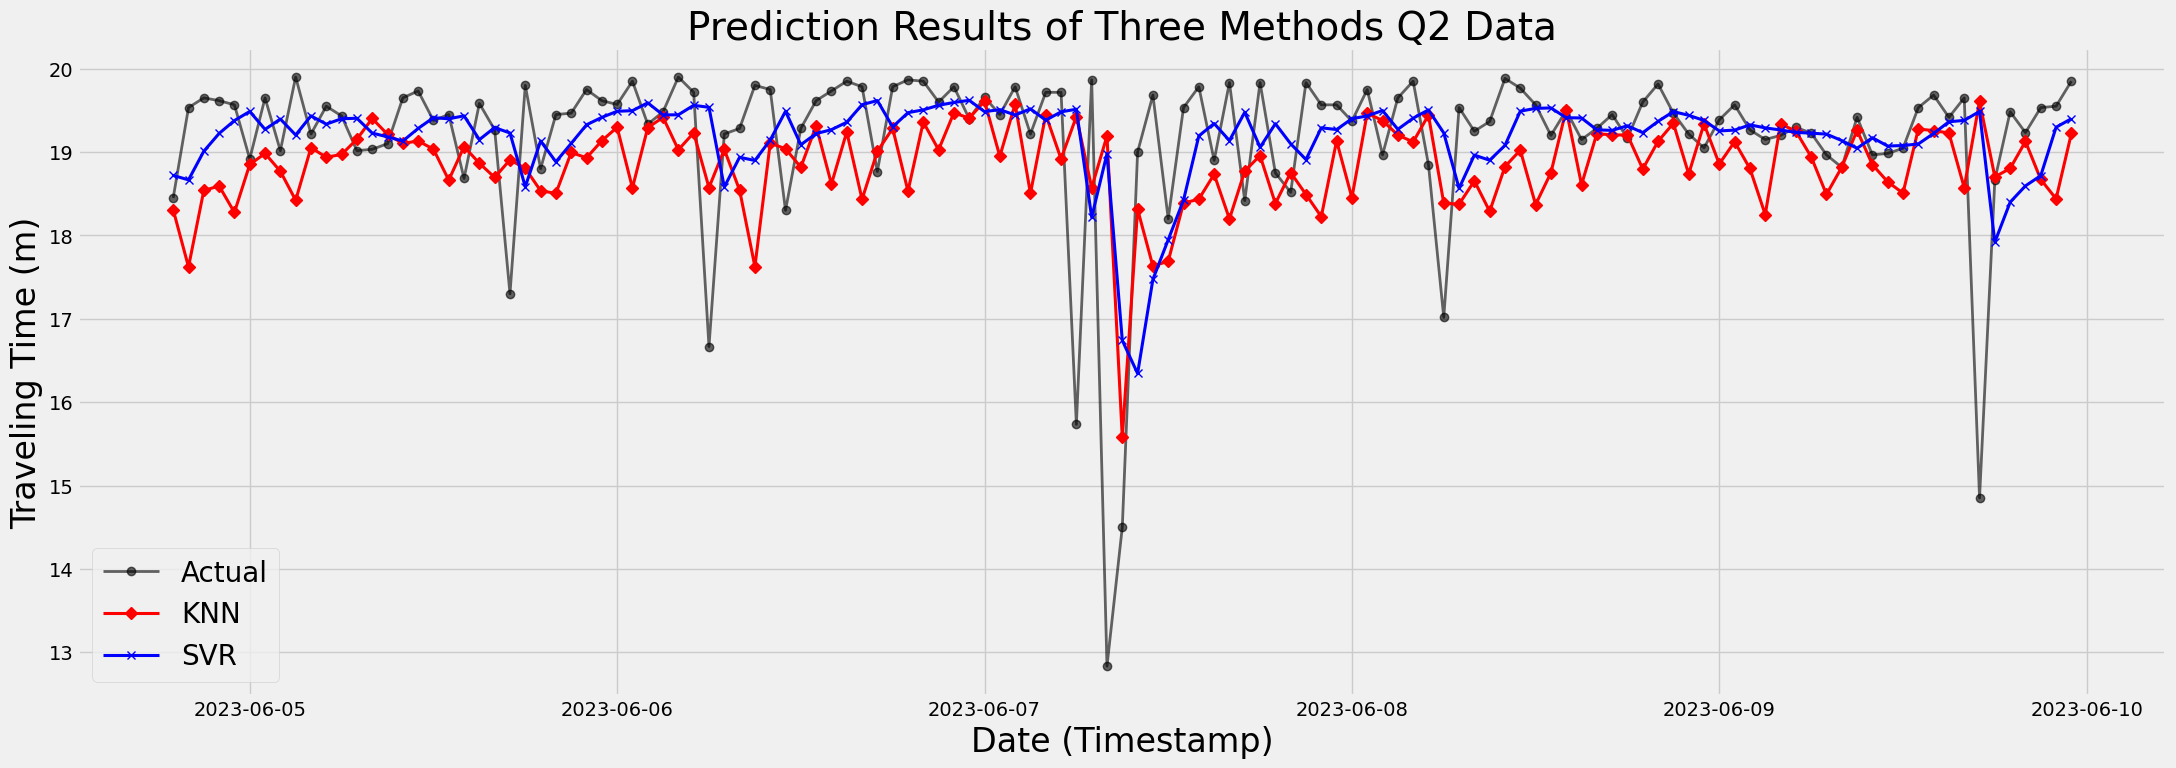

In [99]:
plt.figure(figsize=(24,8))
plt.plot(test_timestamps, y_test, color = 'black', linewidth=2.0, alpha = 0.6, marker='o', markersize=6)
plt.plot(test_timestamps, y_test_pred, color = 'red', linewidth=2.2, marker='D', markersize=6)
plt.plot(test_timestamps, y_test_pred2, color = 'blue', linewidth=2.2, marker='x', markersize=6)
plt.legend(['Actual','KNN', 'SVR'], fontsize=20)
plt.xlabel('Date (Timestamp)', fontsize=24)
plt.ylabel('Traveling Time (m)', fontsize=24)
plt.title("Prediction Results of Three Methods Q2 Data", fontsize=28)
plt.show()

In [100]:

# Report Accuracy metrics for training
def forecast_accuracy(forecast, actual):
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100 # MAPE
  me = np.mean(forecast - actual) # ME
  mae = np.mean(np.abs(forecast - actual)) # MAE
  mpe = np.mean((forecast - actual)/actual) # MPE
  rmse = np.mean((forecast - actual)**2)**.5 # RMSE
  u_statistics = (np.mean((forecast - actual)**2)**.5)/((np.mean((forecast)**2)**.5)*(np.mean((actual)**2)**.5)) # Theils U Statistics
  return({'MAPE':mape, 'ME':me, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse,'Theils U Statistics':u_statistics})

In [101]:
forecast_accuracy(y_test_pred, y_test)

{'MAPE': 4.063048196665036,
 'ME': -0.34092036890804056,
 'MAE': 0.738867784897147,
 'MPE': -0.014524628117557501,
 'RMSE': 1.1085032368655099,
 'Theils U Statistics': 0.0030607554037384225}

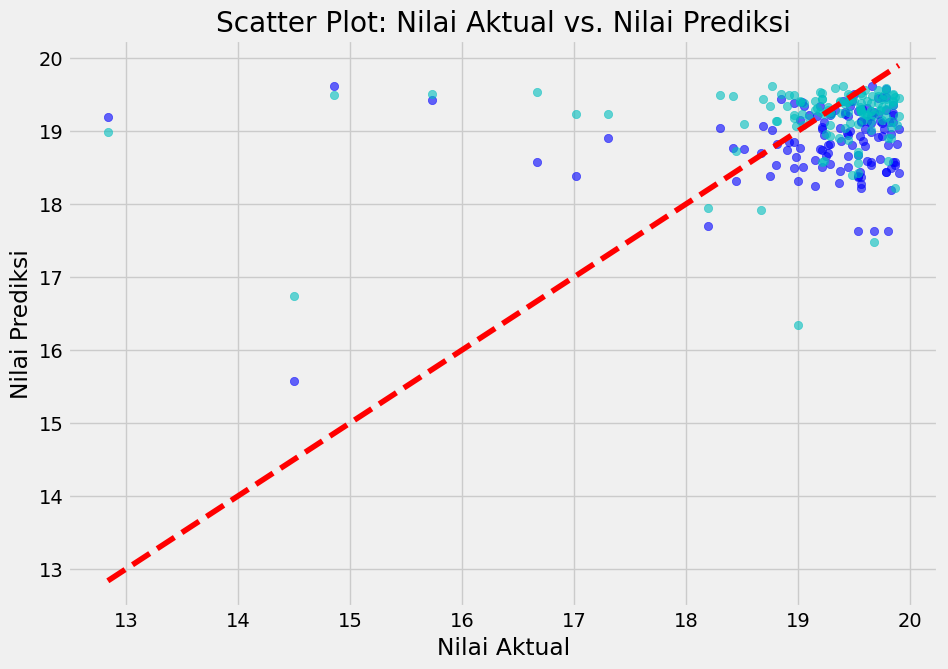

In [102]:
# Scatter Plot: Nilai Aktual vs. Nilai Prediksi
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
plt.scatter(y_test, y_test_pred2, alpha=0.6, color = 'c')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot: Nilai Aktual vs. Nilai Prediksi')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()

In [103]:
data = NewDataSet.filter(['TravelingTime'])

dataset = data.values

training_data_len = math.ceil( len(dataset) * 0.925 )

training_data_len

1547

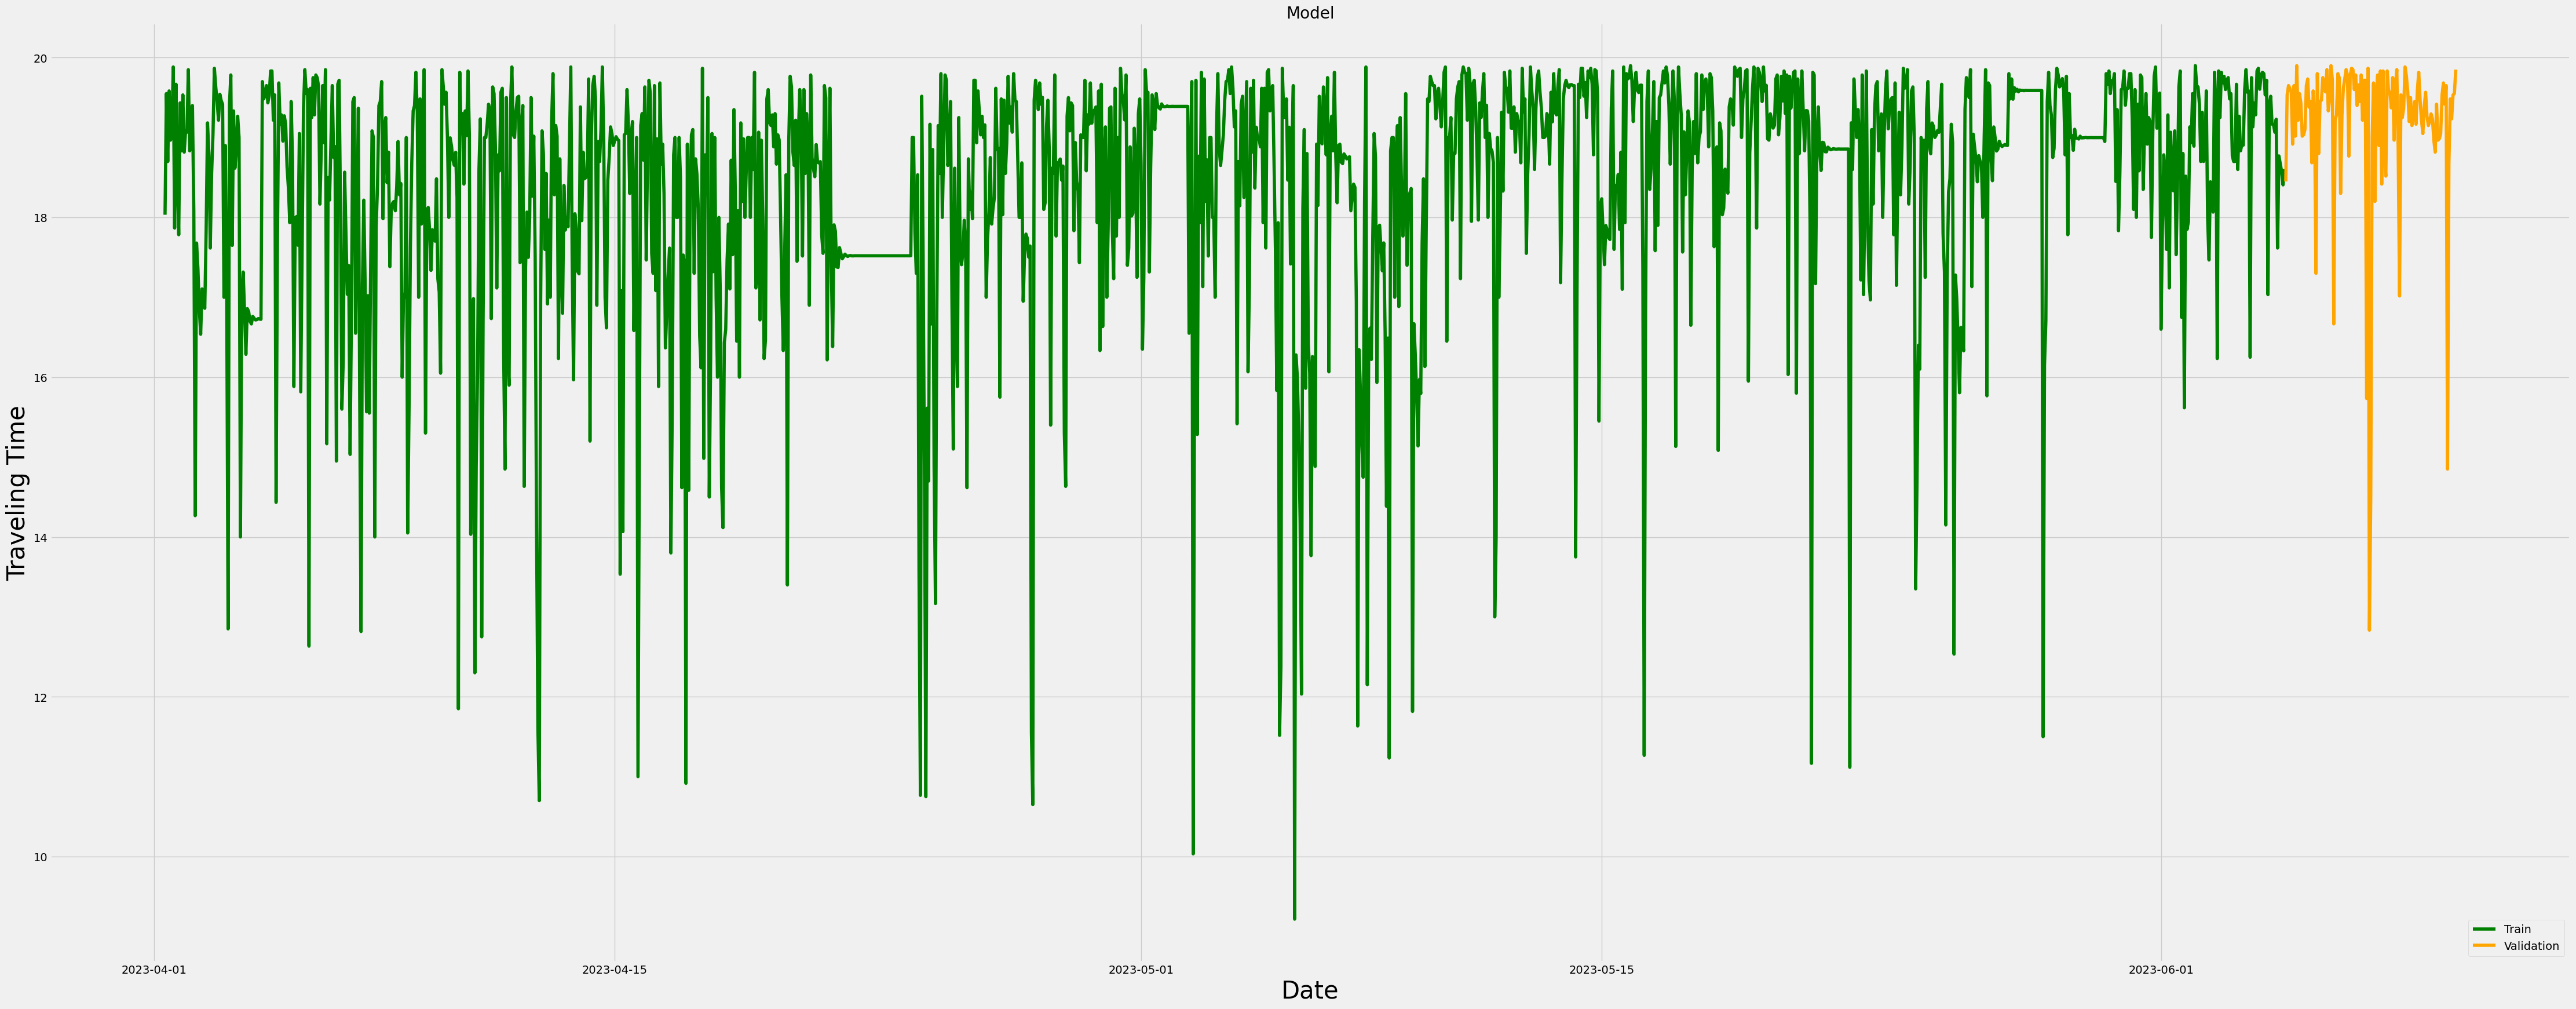

In [104]:
train = data[:training_data_len]
valid = data[training_data_len:]


plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)

plt.plot(train['TravelingTime'], color='green', label='Actual')
plt.plot(valid['TravelingTime'], color="orange", label='validation')

plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [105]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

np.set_printoptions(threshold=np.inf)
print(scaled_data)

[[0.82527301]
 [0.96723869]
 [0.88767551]
 [0.97035881]
 [0.91263651]
 [0.92979719]
 [0.99843994]
 [0.80967239]
 [0.97815913]
 [0.87207488]
 [0.80187207]
 [0.95631825]
 [0.90015601]
 [0.96567863]
 [0.89859594]
 [0.92355694]
 [0.92199688]
 [0.99531981]
 [0.90015601]
 [0.91263651]
 [0.95319813]
 [0.8299532 ]
 [0.47269891]
 [0.79212168]
 [0.76199298]
 [0.71419169]
 [0.68525132]
 [0.73838942]
 [0.72495635]
 [0.71569719]
 [0.80811232]
 [0.93291732]
 [0.89703588]
 [0.78627145]
 [0.87363495]
 [0.92043682]
 [0.99687988]
 [0.975039  ]
 [0.95787832]
 [0.93603744]
 [0.96645866]
 [0.95885335]
 [0.95480694]
 [0.72854914]
 [0.90639626]
 [0.73166927]
 [0.3400936 ]
 [0.95475819]
 [0.98907956]
 [0.78939158]
 [0.94695788]
 [0.8798752 ]
 [0.90132605]
 [0.94071763]
 [0.91575663]
 [0.44773791]
 [0.72854914]
 [0.75819033]
 [0.7125585 ]
 [0.66175897]
 [0.71526424]
 [0.71194301]
 [0.70038118]
 [0.69733685]
 [0.70623132]
 [0.70397309]
 [0.70198061]
 [0.70238047]
 [0.70364137]
 [0.70299388]
 [0.70274908]
 [0.98

In [106]:
train_data = scaled_data[0:training_data_len, :] 

print(train_data)

[[0.82527301]
 [0.96723869]
 [0.88767551]
 [0.97035881]
 [0.91263651]
 [0.92979719]
 [0.99843994]
 [0.80967239]
 [0.97815913]
 [0.87207488]
 [0.80187207]
 [0.95631825]
 [0.90015601]
 [0.96567863]
 [0.89859594]
 [0.92355694]
 [0.92199688]
 [0.99531981]
 [0.90015601]
 [0.91263651]
 [0.95319813]
 [0.8299532 ]
 [0.47269891]
 [0.79212168]
 [0.76199298]
 [0.71419169]
 [0.68525132]
 [0.73838942]
 [0.72495635]
 [0.71569719]
 [0.80811232]
 [0.93291732]
 [0.89703588]
 [0.78627145]
 [0.87363495]
 [0.92043682]
 [0.99687988]
 [0.975039  ]
 [0.95787832]
 [0.93603744]
 [0.96645866]
 [0.95885335]
 [0.95480694]
 [0.72854914]
 [0.90639626]
 [0.73166927]
 [0.3400936 ]
 [0.95475819]
 [0.98907956]
 [0.78939158]
 [0.94695788]
 [0.8798752 ]
 [0.90132605]
 [0.94071763]
 [0.91575663]
 [0.44773791]
 [0.72854914]
 [0.75819033]
 [0.7125585 ]
 [0.66175897]
 [0.71526424]
 [0.71194301]
 [0.70038118]
 [0.69733685]
 [0.70623132]
 [0.70397309]
 [0.70198061]
 [0.70238047]
 [0.70364137]
 [0.70299388]
 [0.70274908]
 [0.98

In [107]:
x_train3 = []
y_train3 = []

for i in range(60, len(train_data)):
  x_train3.append(train_data[i-60:i, 0]) 
  y_train3.append(train_data[i, 0]) #y_train diisi value ke 61 (60)
  if i <= 60:
    print(x_train3)
    print(y_train3)
    print()

[array([0.82527301, 0.96723869, 0.88767551, 0.97035881, 0.91263651,
       0.92979719, 0.99843994, 0.80967239, 0.97815913, 0.87207488,
       0.80187207, 0.95631825, 0.90015601, 0.96567863, 0.89859594,
       0.92355694, 0.92199688, 0.99531981, 0.90015601, 0.91263651,
       0.95319813, 0.8299532 , 0.47269891, 0.79212168, 0.76199298,
       0.71419169, 0.68525132, 0.73838942, 0.72495635, 0.71569719,
       0.80811232, 0.93291732, 0.89703588, 0.78627145, 0.87363495,
       0.92043682, 0.99687988, 0.975039  , 0.95787832, 0.93603744,
       0.96645866, 0.95885335, 0.95480694, 0.72854914, 0.90639626,
       0.73166927, 0.3400936 , 0.95475819, 0.98907956, 0.78939158,
       0.94695788, 0.8798752 , 0.90132605, 0.94071763, 0.91575663,
       0.44773791, 0.72854914, 0.75819033, 0.7125585 , 0.66175897])]
[0.7152642355418467]



In [108]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(1487, 60, 1)

In [109]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [110]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train3, y_train3, batch_size=64, epochs=100, verbose=2)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
24/24 - 9s - 364ms/step - loss: 0.1228
Epoch 2/100
24/24 - 2s - 102ms/step - loss: 0.0227
Epoch 3/100
24/24 - 2s - 99ms/step - loss: 0.0204
Epoch 4/100
24/24 - 3s - 114ms/step - loss: 0.0203
Epoch 5/100
24/24 - 2s - 101ms/step - loss: 0.0204
Epoch 6/100
24/24 - 2s - 102ms/step - loss: 0.0202
Epoch 7/100
24/24 - 2s - 99ms/step - loss: 0.0203
Epoch 8/100
24/24 - 2s - 100ms/step - loss: 0.0201
Epoch 9/100
24/24 - 3s - 111ms/step - loss: 0.0202
Epoch 10/100
24/24 - 3s - 106ms/step - loss: 0.0201
Epoch 11/100
24/24 - 3s - 115ms/step - loss: 0.0200
Epoch 12/100
24/24 - 3s - 115ms/step - loss: 0.0200
Epoch 13/100
24/24 - 3s - 117ms/step - loss: 0.0201
Epoch 14/100
24/24 - 3s - 118ms/step - loss: 0.0199
Epoch 15/100
24/24 - 3s - 116ms/step - loss: 0.0202
Epoch 16/100
24/24 - 3s - 117ms/step - loss: 0.0203
Epoch 17/100
24/24 - 3s - 117ms/step - loss: 0.0199
Epoch 18/100
24/24 - 3s - 117ms/step - loss: 0.0202
Epoch 19/100
24/24 - 3s - 115ms/step - loss: 0.0200
Epoch 20/100
24/24 - 3s

In [111]:
test_data = scaled_data[training_data_len - 60:]

x_test3 = []
y_test3 = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test3.append(test_data[i-60:i, 0])

x_test3 = np.array(x_test3)
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))
x_test3.shape

(125, 60, 1)

In [112]:
predictions3 = model.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)
predictions3

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step


array([[18.585888],
       [18.543854],
       [18.83716 ],
       [18.952192],
       [19.011797],
       [19.028534],
       [18.852764],
       [19.009037],
       [18.851389],
       [19.07412 ],
       [18.92545 ],
       [19.00383 ],
       [18.97697 ],
       [18.860073],
       [18.82995 ],
       [18.827185],
       [18.980934],
       [19.051205],
       [18.991436],
       [19.00645 ],
       [18.786074],
       [18.983347],
       [18.921602],
       [18.376122],
       [18.919394],
       [18.719667],
       [18.91532 ],
       [18.954378],
       [19.071115],
       [19.072401],
       [19.07382 ],
       [19.154573],
       [19.028036],
       [19.044708],
       [19.15371 ],
       [19.13335 ],
       [18.280174],
       [18.757755],
       [18.798048],
       [19.01633 ],
       [19.07492 ],
       [18.7073  ],
       [18.89149 ],
       [18.991102],
       [19.07471 ],
       [19.14621 ],
       [19.158333],
       [18.878468],
       [19.092041],
       [19.14074 ],


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15480\276240779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


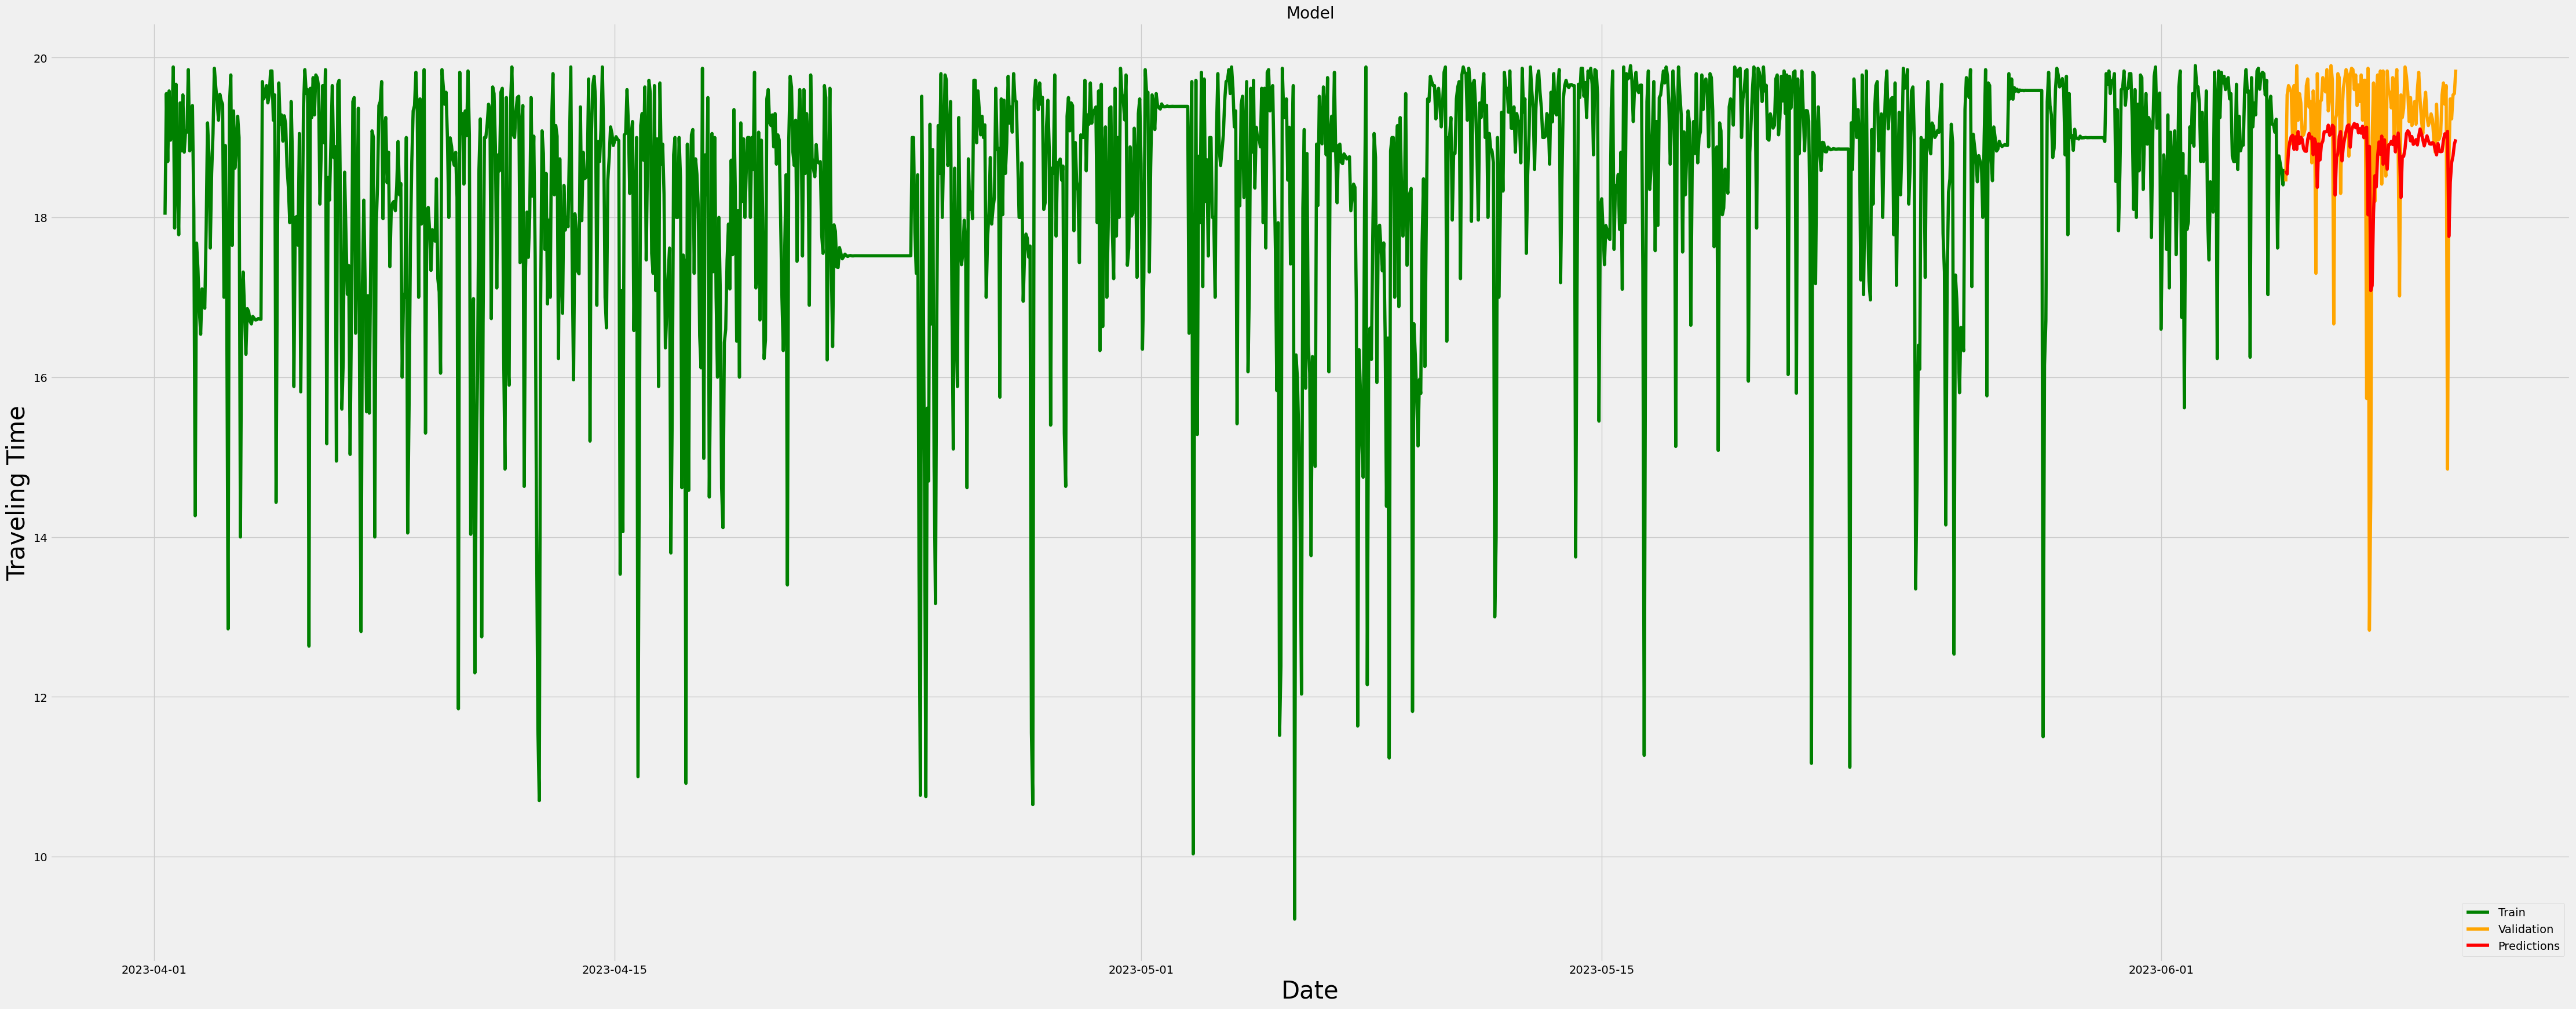

In [113]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3

plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)

plt.plot(train['TravelingTime'], color='green', label='Actual')
plt.plot(valid['TravelingTime'], color="orange", label='validation')
plt.plot(valid['Predictions'], color="red", label='Prediction')

plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15480\2797276460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


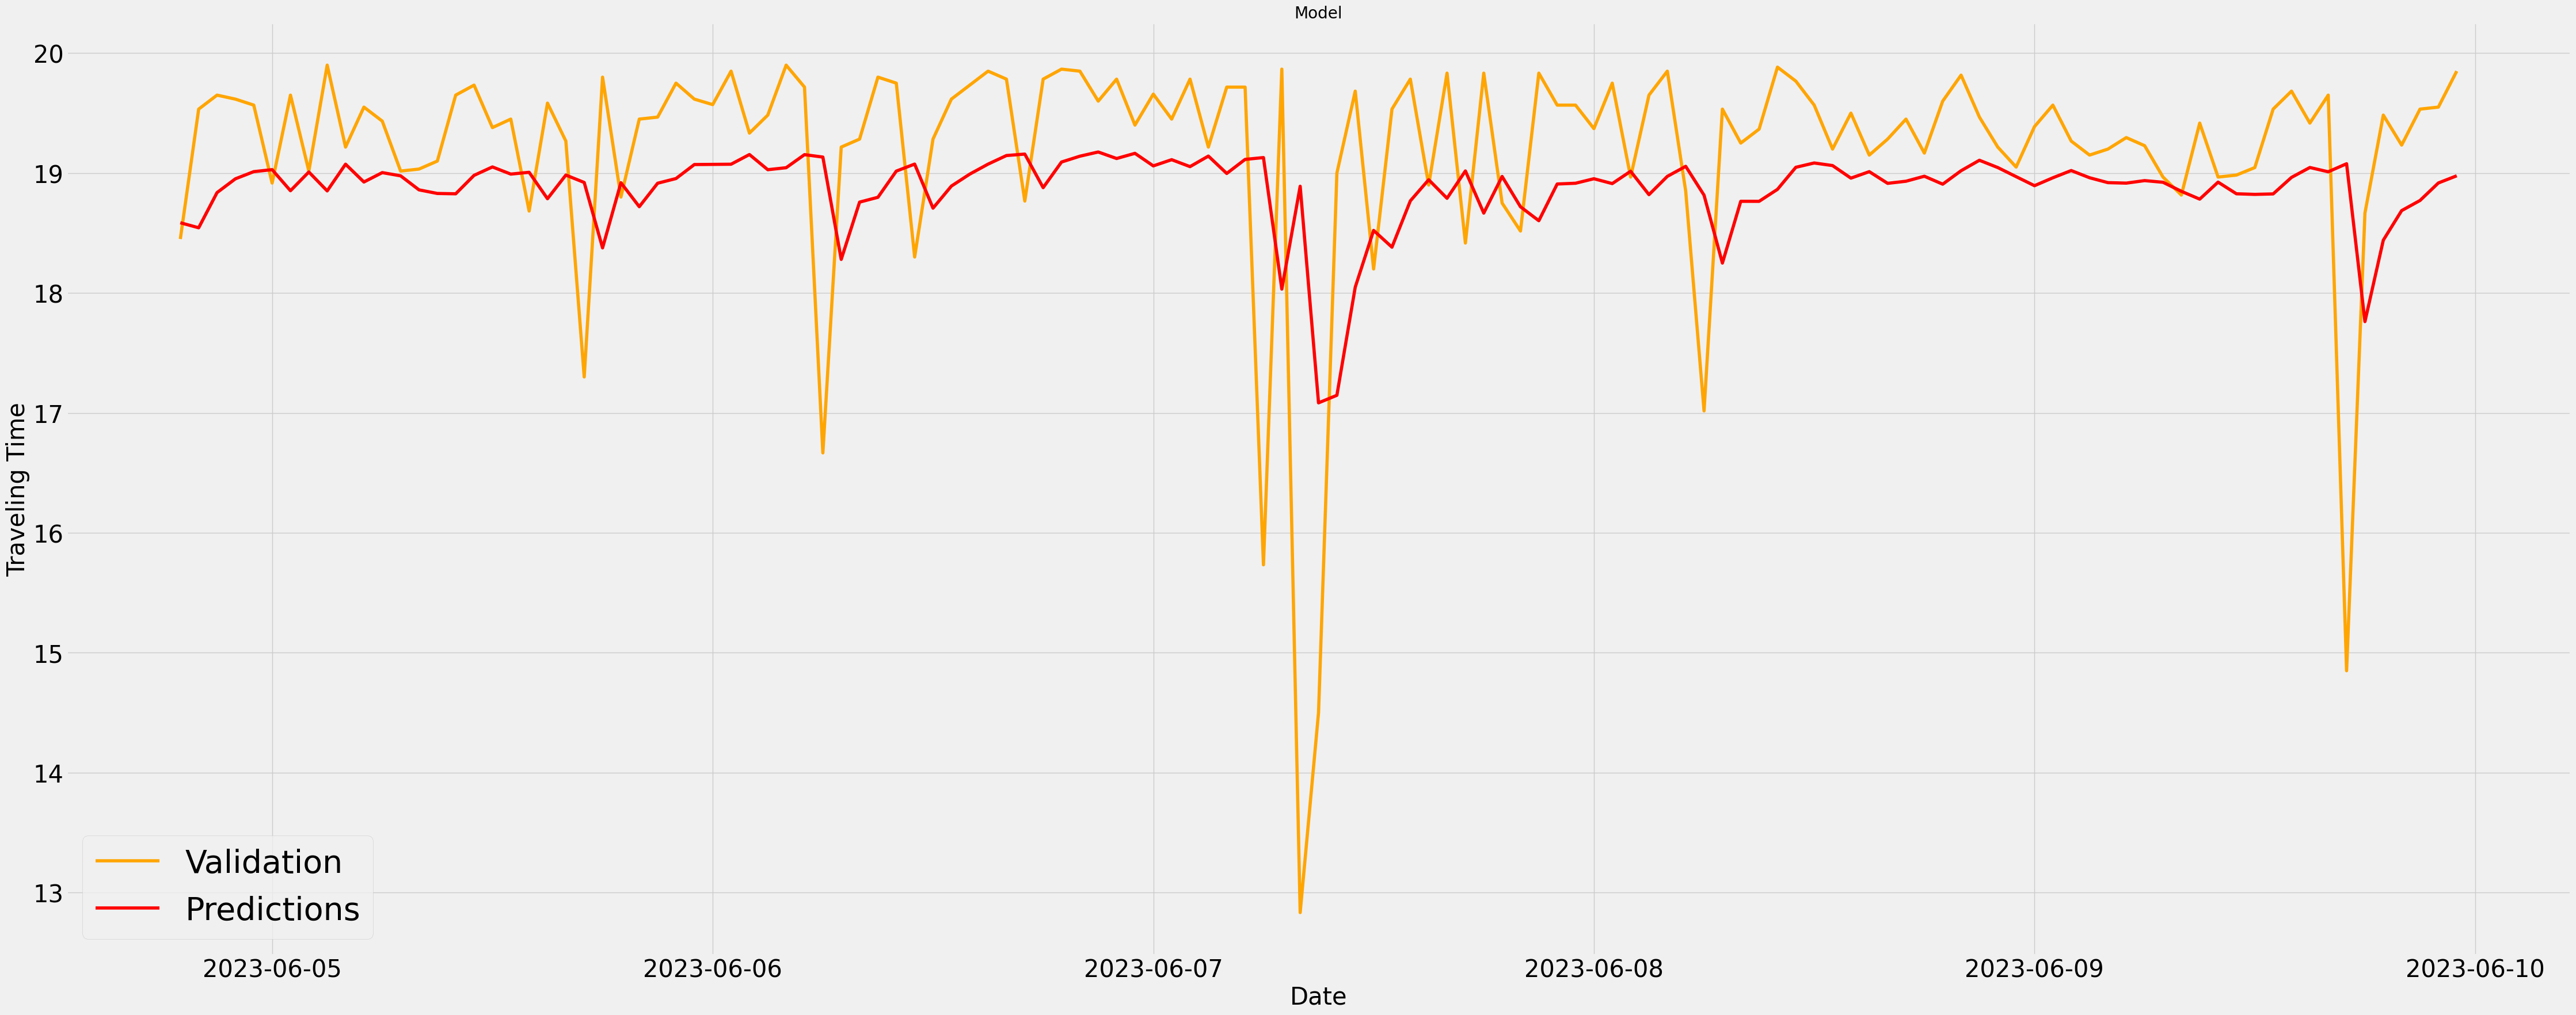

In [114]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3

plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.plot(valid['TravelingTime'], color="orange", label='validation')
plt.plot(valid['Predictions'], color="red", label='Prediction')

plt.legend([ 'Validation', 'Predictions'], fontsize="40", loc ="lower left")
plt.show()

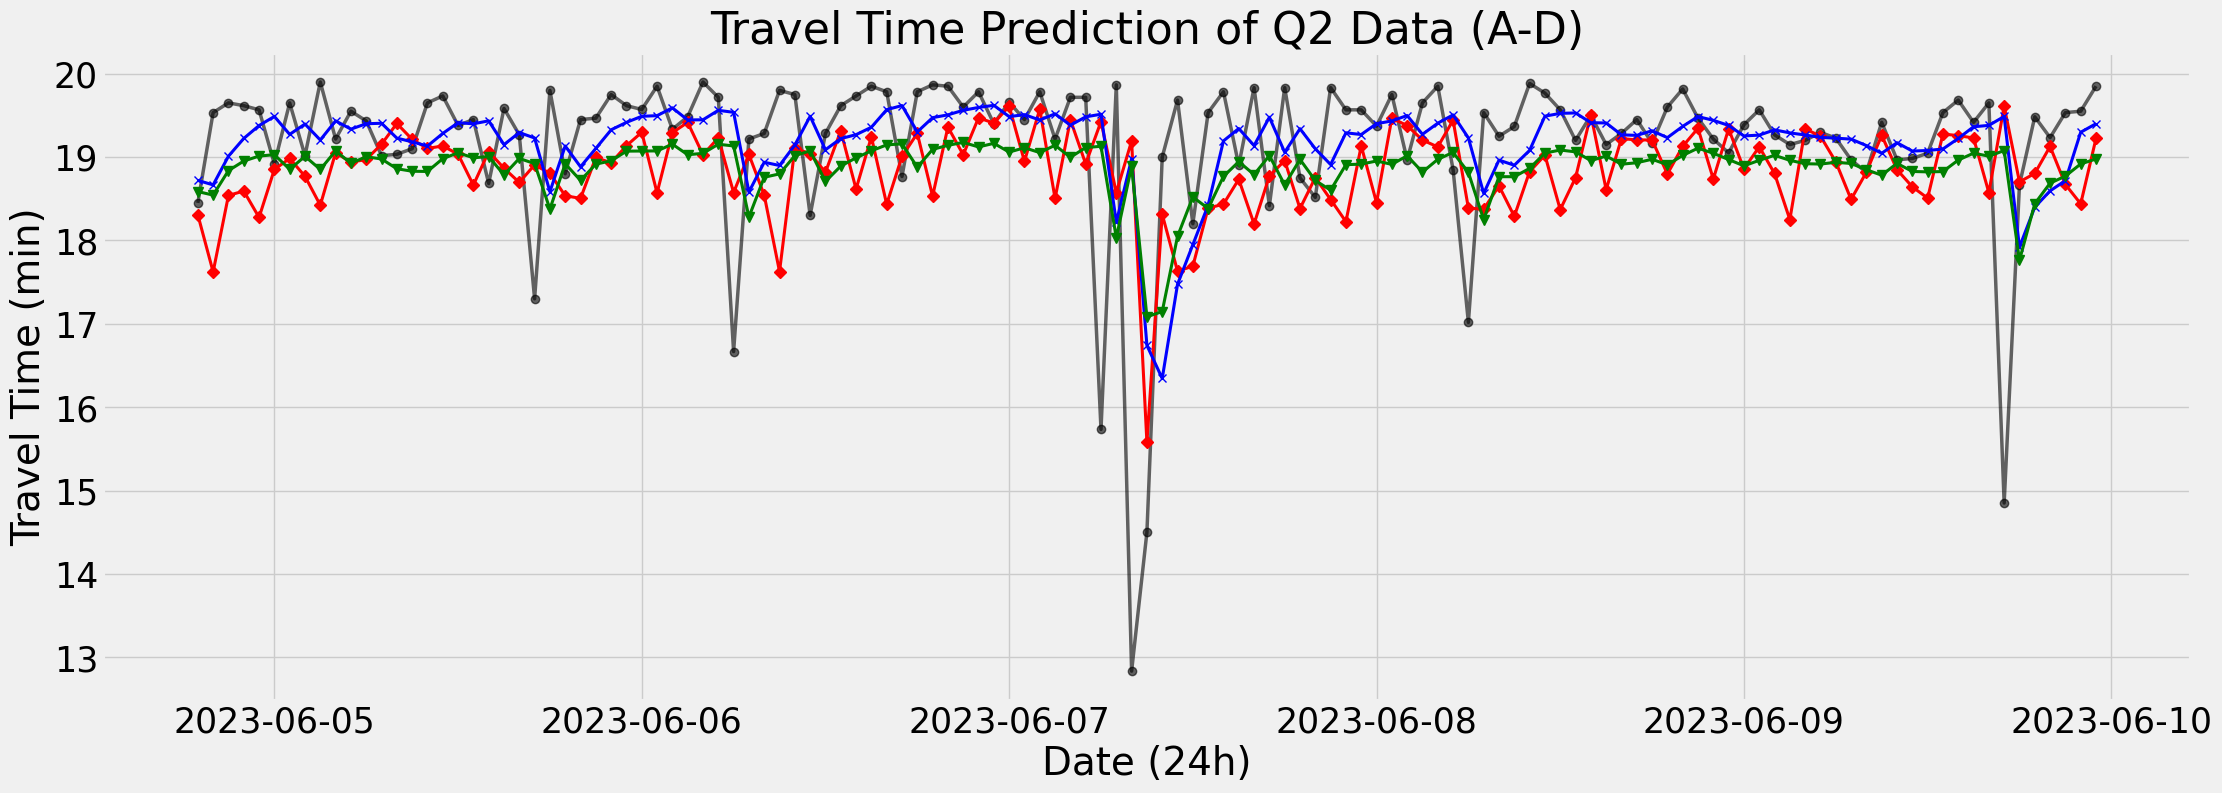

In [121]:
plt.figure(figsize=(24,8))
plt.plot(test_timestamps, y_test, color = 'black', linewidth=2.5, alpha = 0.6, marker='o', markersize=6, label='Aktual')
plt.plot(test_timestamps, y_test_pred, color = 'red', linewidth=2.2, marker='D', markersize=6)
plt.plot(test_timestamps, y_test_pred2, color = 'blue', linewidth=2.2, marker='x', markersize=6, label='SVR')
plt.plot(valid['Predictions'], color="g", linewidth=2.2, marker='v', markersize=7)
#plt.legend(['Aktual','KNN', 'SVR', 'LSTM'], fontsize=20)
plt.xlabel('Date (24h)', fontsize=28)
plt.ylabel('Travel Time (min)', fontsize=28)
plt.title("Travel Time Prediction of Q2 Data (A-D)", fontsize=32)
# Mengatur ukuran font untuk label sumbu x dan y
plt.tick_params(axis='x', labelsize=25)  # Ukuran font untuk label sumbu x
plt.tick_params(axis='y', labelsize=25)  # Ukuran font untuk label sumbu y
plt.show()

In [116]:
#KNN

from sklearn.metrics import mean_absolute_error as mae 
rmse = sqrt(mean_squared_error(y_test, y_test_pred))
mae =mae(y_test, y_test_pred)
range_data = y_test.max() - y_test.min()
rmse_percent = (rmse / range_data) * 100
print('RMSE:', rmse, 'MAE:', mae, "RMSE as percentage of data range:", rmse_percent, "%")

RMSE: 1.1085032368655099 MAE: 0.738867784897147 RMSE as percentage of data range: 15.686366567204502 %


In [117]:
#SVR
from math import *
from sklearn.metrics import mean_absolute_error as mae
 
rmse2 = sqrt(mean_squared_error(y_test, y_test_pred2))
mae2 =mae(y_test, y_test_pred2)
range_data2 = y_test.max() - y_test.min()
rmse_percent2 = (rmse2 / range_data2) * 100
print('RMSE:', rmse2, 'MAE:', mae2, "RMSE as percentage of data range:", rmse_percent2, "%")

RMSE: 1.0431731411233158 MAE: 0.5952040277083105 RMSE as percentage of data range: 14.761884079827736 %


In [118]:
#LSTM
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error
import math
from numpy import sqrt 

rmse3 = sqrt(mean_squared_error(y_test3, predictions3))
mae3 =mae(y_test3, predictions3)
range_data3 = y_test3.max() - y_test3.min()
rmse_percent3 = (rmse3 / range_data3) * 100
print('RMSE:', rmse3, 'MAE:', mae3, "RMSE as percentage of data range:", rmse_percent3, "%")

RMSE: 1.061829437991894 MAE: 0.7284582308239542 RMSE as percentage of data range: 15.025888280929237 %
